<a href="https://colab.research.google.com/github/ANGELA-NYUTU/Parkinson-s_Disease_Diagnosis/blob/main/Parkinson's_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Company wants to automate the loan eligibility process based on customer detail provided while filling online application form.
# To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
# Your task is to predict the loan eligibility.
# -------
# Dataset url ----> http://bit.ly/loan_data


In [ ]:
# Importing all the libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('http://bit.ly/loan_data')
df.head()
# Preparing the data
X=df.drop(columns=['Loan_Status','Loan_ID'],axis=1).values
X
feat=df.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y=df['Loan_Status'].values
Y
# Define our features and labels
df.head()
feature_names=['Gender','Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']
g

array(['1', '0'], dtype=object)

In [ ]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,302.256293,0.835240,0.661327,0.842105,0.192220,5225.897025,1737.647597,140.295195,331.441648,0.949657,0.684211
std,177.305413,0.371389,0.473801,1.083768,0.394496,5572.041719,3297.265221,83.939047,86.424276,0.827969,0.465362
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.000000,1.000000,0.000000,0.000000,0.000000,2882.000000,0.000000,98.000000,360.000000,0.000000,0.000000
50%,293.000000,1.000000,1.000000,0.000000,0.000000,3717.000000,1255.000000,127.000000,360.000000,1.000000,1.000000
75%,454.000000,1.000000,1.000000,2.000000,0.000000,5708.000000,2375.000000,168.000000,360.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,63337.000000,41667.000000,700.000000,480.000000,2.000000,1.000000


In [ ]:
df.dtypes

Loan_ID              int64
Gender               int64
Married              int64
Dependents           int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Property_Area        int64
Loan_Status          int64
dtype: object

In [ ]:
# Splitting the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# Instantiate your model]
dec_class=DecisionTreeClassifier(max_depth=5,min_samples_split=20)
# Fitting the model
dec_class=dec_class.fit(X_train,Y_train)
# predicticting the model
y_tree_pred=dec_class.predict(X_test)
# Evaluating the model
ac=accuracy_score(Y_test,y_tree_pred)
cm=confusion_matrix(Y_test,y_tree_pred)
print(ac)
print(cm)

0.6818181818181818
[[ 5 21]
 [ 7 55]]


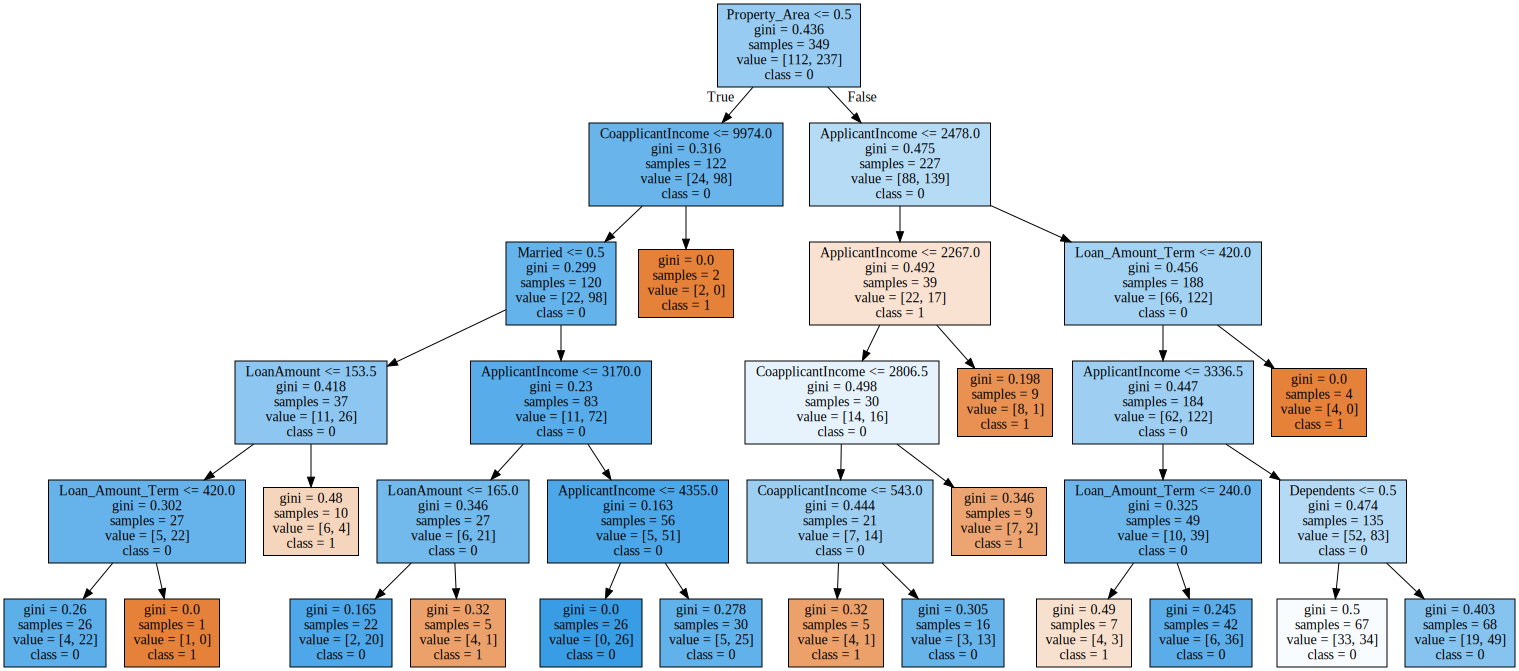

In [ ]:
# vizualizing the tree
from sklearn import tree
import graphviz
# Plotting the tree
# How to modify trees using graphviz
dot_data=tree.export_graphviz(dec_class,out_file=None,feature_names=feature_names,class_names=label,filled=True)

graph=graphviz.Source(dot_data,format='png')

graph


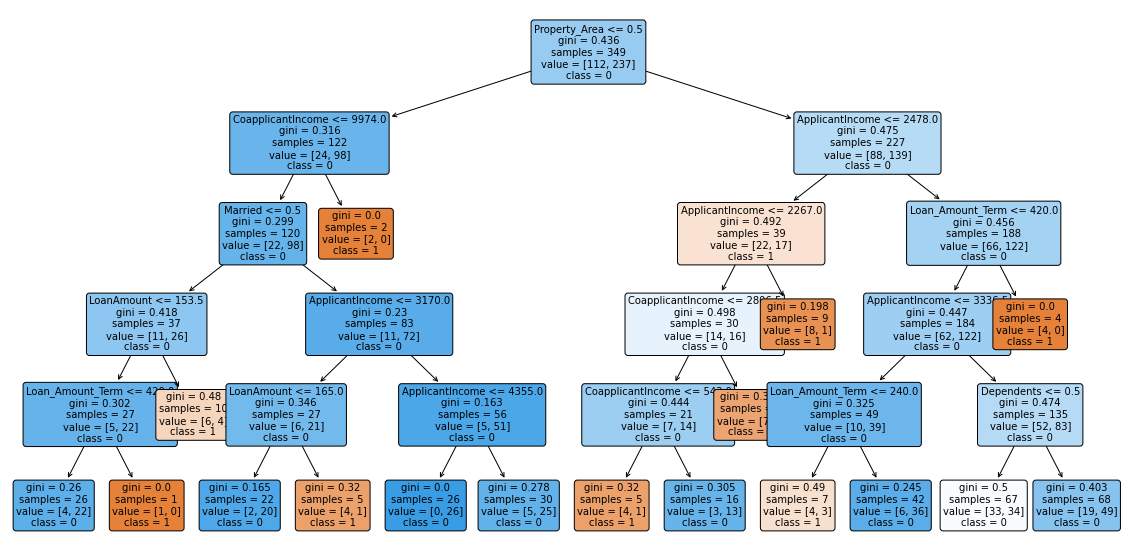

In [ ]:
import matplotlib.pyplot as plt

#Plotting
fig=plt.figure(figsize=(20,10))
tree.plot_tree(dec_class,feature_names=feature_names,class_names=label,filled=True,fontsize=10,rounded=True)
plt.show()

# Optimizing our model

In [ ]:
# Using Random Forest
forest=RandomForestClassifier(n_estimators=300,min_samples_split=20,max_depth=5)
# Fitting our training data
forest=forest.fit(X_train,Y_train)
# Predicting 
Y_forest_pred=forest.predict(X_test)
# Evaluating my model
ac1=accuracy_score(Y_test,Y_forest_pred)
print(ac1)

0.6931818181818182


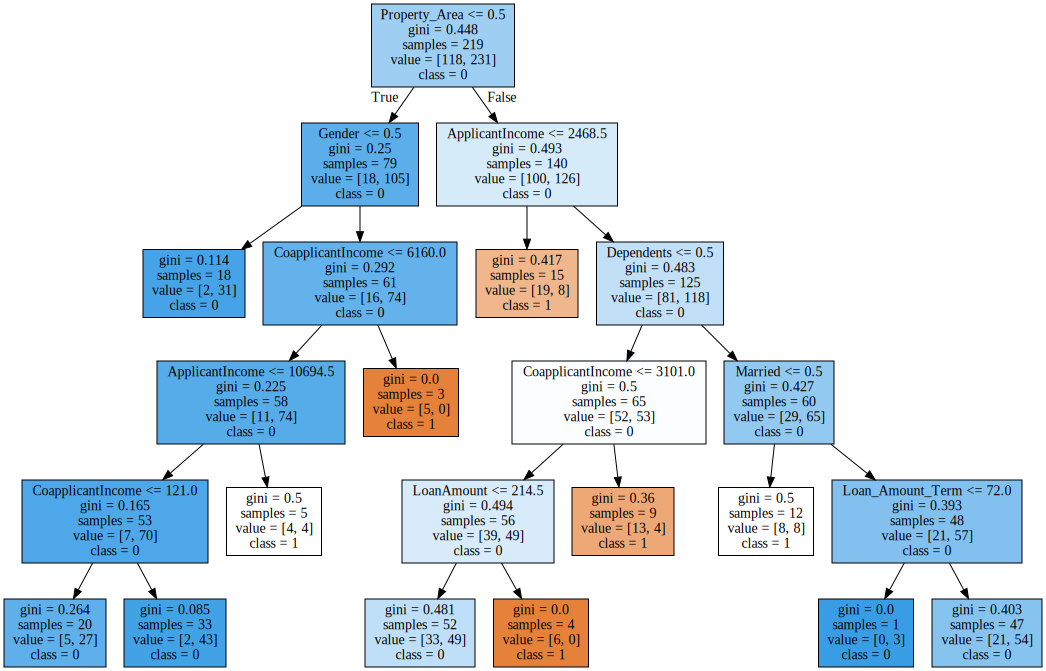

In [ ]:
# Readjusting the number of trees
trees=forest.estimators_[100]

data2=tree.export_graphviz(trees,feature_names=feature_names,class_names=label,filled=True)

graph=graphviz.Source(data2,format='png')
graph

Text(0.5, 1.0, 'Feature importance')

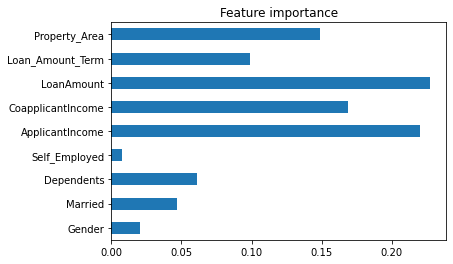

In [ ]:
# Importance of features in random forest
feature_importance=pd.Series(forest.feature_importances_,index=feat.columns)
feature_importance.plot(kind='barh')
plt.title('Feature importance')


In [ ]:
# Adaboost regressor
baseline=DecisionTreeClassifier(max_depth=2)
ada=AdaBoostClassifier(baseline,n_estimators=300,learning_rate=1.0)

# Fitting out model
ada=ada.fit(X_train,Y_train)
# Predicting our model
Y_ada_pred=ada.predict(X_test)
# Evaluating our model
ac_ada=accuracy_score(Y_test,Y_ada_pred)
print(ac_ada)

0.625


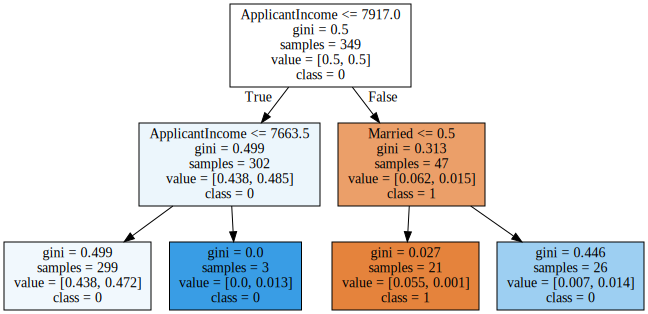

In [ ]:
# Plotting the stumps
stumps=ada.estimators_[200]
stump=tree.export_graphviz(stumps,feature_names=feature_names,class_names=label,filled=True)

graph=graphviz.Source(stump,format='png')

graph

In [ ]:
# Gradient boosting n_estimators=max_number_stumps,
max_number_stumps=200 
grad_class=GradientBoostingClassifier(n_estimators=max_number_stumps,max_depth=3,learning_rate=0.5)
# Fitting the model
grad_class=grad_class.fit(X_train,Y_train)
# Predicting
Y_grad_pred=grad_class.predict(X_test)
# Evaluating the model
ac=accuracy_score(Y_test,Y_grad_pred)
print(ac)

0.5454545454545454


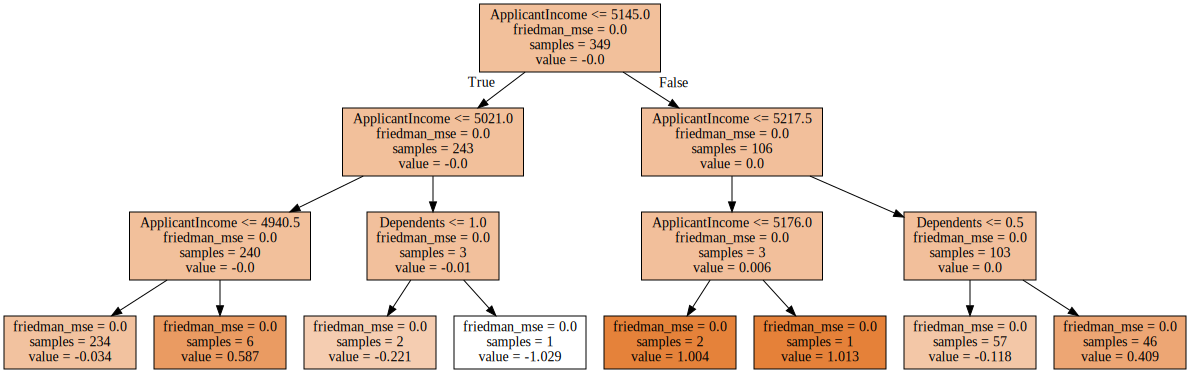

In [ ]:
# Plotting the gradient boosted trees
gradient_trees=grad_class.estimators_[199,0]

grad_trees=tree.export_graphviz(gradient_trees,feature_names=feature_names,class_names=label,filled=True)

graph=graphviz.Source(grad_trees,format='png')
graph

plotting the deviance accoss the models

<Figure size 432x288 with 0 Axes>

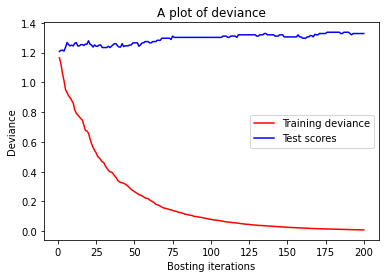

In [ ]:
# We are plotting the deviance to proove that the adaboost regressor reduces loss function/deviance as new stumps get created.
plt.figure()
plt.subplots()
plt.title("A plot of deviance")
# Plotting an array of the number of stumps used 
plt.plot(np.arange(max_number_stumps)+1,grad_class.train_score_,label='Training deviance',c='r')
# Plotting the test score
test_scores=np.zeros((max_number_stumps),dtype=np.float64)
# Test sets 
for i, Y_pred in enumerate(grad_class.staged_predict(X_test)):
  test_scores[i]=grad_class.loss_(Y_test,Y_pred)# We will use res
plt.plot(np.arange(max_number_stumps)+1,test_scores,label='Test scores',c='b')
plt.legend()
plt.xlabel('Bosting iterations')
plt.ylabel('Deviance')
plt.show()


Support Vector Machines

In [ ]:
# Instantiate your model

from sklearn.svm import LinearSVC,SVC
svm=SVC(kernel='linear')
svm.fit(X_train,Y_train)
# Predicting
Y_svm_pred=svm.predict(X_test)
# Evaluating the model
svm.acc=accuracy_score(Y_test,Y_svm_pred)
print(svm.acc)

0.7045454545454546
